In [1]:
"""
Experiement #60
Time vs Mean Fluorescence of MitoSox and CellRox Green
in W2 and VPA Rings
"""

# Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Apply theme
sns.set_theme(style="whitegrid")

# set options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
"""
Process file to remove redundant columns
df2 is only data from the W2 strain
"""
input_file = "./230227 #60 1-3hrs-Batch_Analysis_08032023084915.csv"
df = pd.read_csv(input_file)

# Remove redundant columns
df = df.drop(columns=["Experiment Name", "Specimen Name", "$OP", "GUID", "Record Date", "All Events %Parent"
                      ,"All Events %Total","All Events FITC-A Mean","All Events PE-A Mean","All Events APC-A Mean"
                     ,"P1 %Parent","P1 %Total","P1 FITC-A Mean","P1 PE-A Mean","P1 APC-A Mean","P3 FITC-A Mean"
                     ,"P3 %Total","P2 %Parent", "P2 %Total","P3 %Parent","P2 FITC-A Mean"])
df

,Well Name,P2 PE-A Mean,P2 APC-A Mean,P3 PE-A Mean,P3 APC-A Mean,time,strain,group,dye,time.1,strain.1,group.1,dye.1
0,A1,705.93,760.97,449.57,479.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A2,210.52,119.24,140.97,105.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3,3929.47,1892.16,3940.70,1341.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A4,691.33,1107.86,173.10,509.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B1,695.93,111.97,367.14,148.36,1 hour,W2,TQ 10uM,MitoSox,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 hour,NaN,NaN,NaN
560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 hour,NaN,NaN,NaN
561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 hour,NaN,NaN,NaN
562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 hour,NaN,NaN,NaN


In [3]:
"""
More processing to account for high TQ autofluorescences.
P2 is gated for high TQ and P3 is gated for others
Combine P2 PE-A/APC-A Mean from TQ 10uM and P3 PE-A/APC-A Mean to PE and APC columns.
"""

df_pep2 = df.loc[df.group == "TQ 10uM"]["P2 PE-A Mean"]
df_pep3 = df.loc[df.group != "TQ 10uM"]["P3 PE-A Mean"]

df_apcp2 = df.loc[df.group == "TQ 10uM"]["P2 APC-A Mean"]
df_apcp3 = df.loc[df.group != "TQ 10uM"]["P3 APC-A Mean"]

df["PE"] = df_pep2.combine_first(df_pep3)
df["APC"] = df_apcp2.combine_first(df_apcp3)


df.head(16)

,Well Name,P2 PE-A Mean,P2 APC-A Mean,P3 PE-A Mean,P3 APC-A Mean,time,strain,group,dye,time.1,strain.1,group.1,dye.1,PE,APC
0,A1,705.93,760.97,449.57,479.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449.57,479.25
1,A2,210.52,119.24,140.97,105.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.97,105.84
2,A3,3929.47,1892.16,3940.70,1341.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3940.70,1341.00
3,A4,691.33,1107.86,173.10,509.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.10,509.83
4,B1,695.93,111.97,367.14,148.36,1 hour,W2,TQ 10uM,MitoSox,NaN,NaN,NaN,NaN,695.93,111.97
5,B2,846.98,129.80,368.31,156.00,1 hour,W2,TQ 10uM,MitoSox,NaN,NaN,NaN,NaN,846.98,129.80
6,B3,925.60,111.10,469.35,152.29,1 hour,W2,TQ 10uM,MitoSox,NaN,NaN,NaN,NaN,925.60,111.10
7,B4,828.67,112.67,410.96,153.48,1 hour,W2,TQ 10uM,MitoSox,NaN,NaN,NaN,NaN,828.67,112.67
8,B5,999.73,133.63,561.04,160.12,1 hour,W2,TQ 10uM,MitoSox,NaN,NaN,NaN,NaN,999.73,133.63
9,B6,1015.22,129.65,494.56,159.50,1 hour,W2,TQ 10uM,MitoSox,NaN,NaN,NaN,NaN,1015.22,129.65


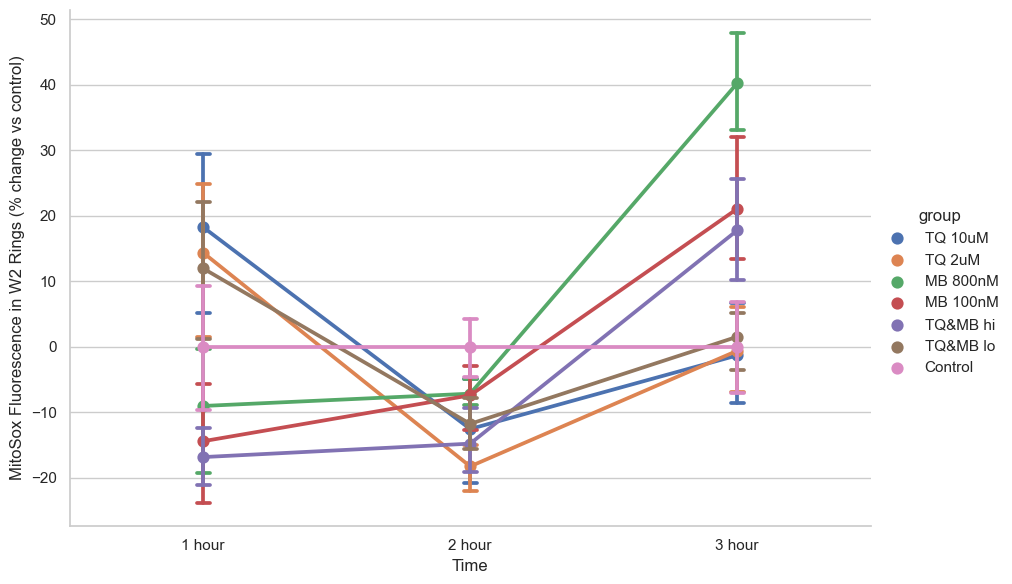

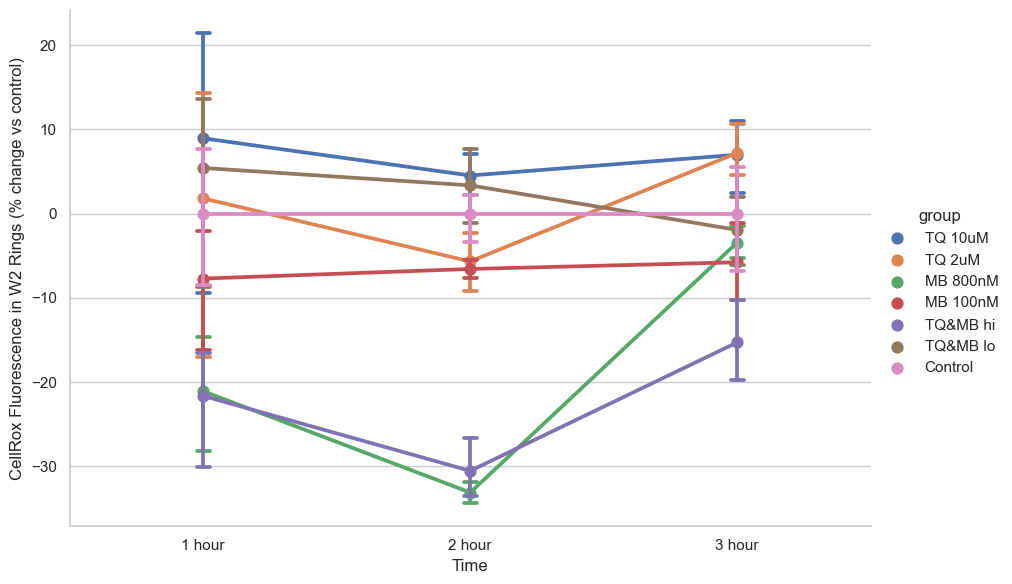

In [4]:
"""
W2 - MitoSox and CellRox normalised to control
"""
df2= df.loc[df.strain == "W2"]

strain = "W2"
stage = "Rings"

dye_pop_strain_stage = [
    ("MitoSox","PE",strain, stage),
    ("CellRox","APC",strain, stage)
]

def time_vs_Mean_Fluorescence(dye,pop,strain,stage):
    
    time_list = ["1 hour", "2 hour", "3 hour"]
    for time in time_list:

        #Calculate Mean
        ################################################
        df_Control = df2.loc[(df2.group == "Control")&(df2.time == time)&(df2.dye==dye)][pop]
        df_Control_mean = df_Control.mean()

        # Normalise values
        ################################################
        df2.loc[(df2.time == time)&(df2.dye==dye), pop
                   ]= (((df2[pop]/df_Control_mean))* 100) -100

    
    
    # Set parameters for plots
    data = df2.loc[(df2.dye == dye)]
    x="time"
    y=pop
    # Skip live/dead normalisation

    ylabel=f"{dye} Fluorescence in {strain} {stage} (% change vs control)"
    
    xlabel="Time"
    height=6
    aspect=1.5
    errorbar="sd"
    hue="group"
    kind="point"
    capsize=0.05

    # Assign graph
    ax = sns.catplot(data=data, x=x, y=y, hue=hue,kind=kind,
                     height=height,aspect=aspect, errorbar=errorbar,capsize=capsize)
    ax.set(xlabel=xlabel, ylabel=ylabel)

    # Save png file and show plot
    plt.savefig(ylabel.replace(' ','_'))
    plt.show()

for dye,pop,strain,stage in dye_pop_strain_stage:
    time_vs_Mean_Fluorescence(dye,pop,strain,stage)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:1.621e-01 t=1.509e+00
TQ&MB hi vs. Control: t-test independent samples, P_val:1.568e-02 t=-2.906e+00
MB 100nM vs. Control: t-test independent samples, P_val:7.547e-02 t=-1.983e+00
MB 800nM vs. Control: t-test independent samples, P_val:2.496e-01 t=-1.222e+00
TQ 2uM vs. Control: t-test independent samples, P_val:1.204e-01 t=1.698e+00
TQ 10uM vs. Control: t-test independent samples, P_val:5.434e-02 t=2.179e+00


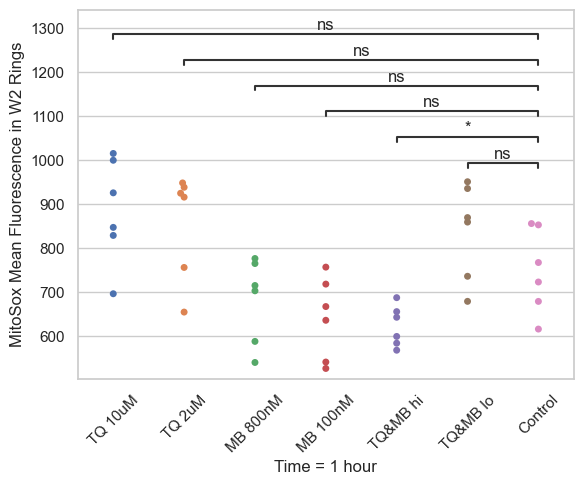

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:6.872e-03 t=-3.391e+00
TQ&MB hi vs. Control: t-test independent samples, P_val:3.830e-03 t=-3.743e+00
MB 100nM vs. Control: t-test independent samples, P_val:7.197e-02 t=-2.012e+00
MB 800nM vs. Control: t-test independent samples, P_val:3.080e-02 t=-2.512e+00
TQ 2uM vs. Control: t-test independent samples, P_val:2.461e-04 t=-5.544e+00
TQ 10uM vs. Control: t-test independent samples, P_val:3.750e-02 t=-2.397e+00


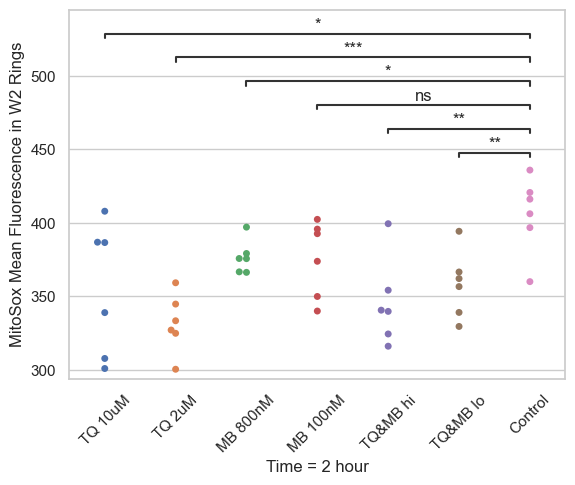

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:7.577e-01 t=3.170e-01
TQ&MB hi vs. Control: t-test independent samples, P_val:1.439e-02 t=2.956e+00
MB 100nM vs. Control: t-test independent samples, P_val:1.156e-02 t=3.084e+00
MB 800nM vs. Control: t-test independent samples, P_val:4.606e-05 t=6.824e+00
TQ 2uM vs. Control: t-test independent samples, P_val:9.112e-01 t=-1.144e-01
TQ 10uM vs. Control: t-test independent samples, P_val:8.273e-01 t=-2.239e-01


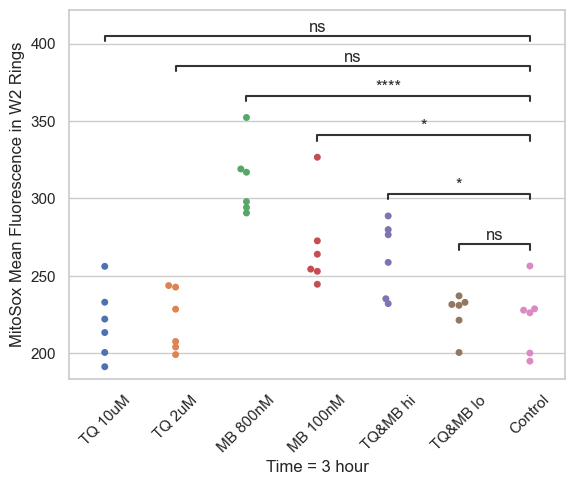

In [5]:
"""
W2
MitoSox
"""
df2= df.loc[df.strain == "W2"]
df2_mitosox = df2.loc[df2.dye == "MitoSox"]

time_list = ["1 hour","2 hour","3 hour"]

for time in time_list:
    df_temp = df2_mitosox.loc[(df2_mitosox.time == time)]
    
    # Set parameters
    data= df_temp
    x="group"
    y="PE"
    xlabel=f"Time = {time}"
    ylabel="MitoSox Mean Fluorescence in W2 Rings"
    height=6
    aspect=1.5
    order = ["Control",'TQ 2uM','TQ 10uM','MB 100nM','MB 800nM','TQ&MB lo','TQ&MB hi']
    # Assign graph
    plot = sns.swarmplot(data=data, x=x, y=y)
    plot.set(xlabel=xlabel, ylabel=ylabel)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

    # Assign pairs for statistical analysis
    pairs = [
        ('Control', 'TQ 10uM'),
        ('Control', 'MB 800nM'),
        ('Control', 'TQ&MB hi'),
        ('Control', 'TQ 2uM'),
        ('Control', 'MB 100nM'),
        ('Control', 'TQ&MB lo'),
        ]

    # load up statannotation.annotator
    annotator = Annotator(plot, pairs, data=data, x=x, y=y)
    annotator.configure(test="t-test_ind")
    annotator.apply_and_annotate()

    # Save png file and show plot
    savefig = ylabel+"@"+time
    savefig = savefig.replace(' ','_')
    plt.savefig(f"{savefig}.png")
    plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:5.415e-01 t=6.321e-01
TQ&MB hi vs. Control: t-test independent samples, P_val:6.751e-03 t=-3.402e+00
MB 100nM vs. Control: t-test independent samples, P_val:2.613e-01 t=-1.191e+00
MB 800nM vs. Control: t-test independent samples, P_val:6.590e-03 t=-3.416e+00
TQ 2uM vs. Control: t-test independent samples, P_val:8.634e-01 t=1.766e-01
TQ 10uM vs. Control: t-test independent samples, P_val:3.956e-01 t=8.876e-01


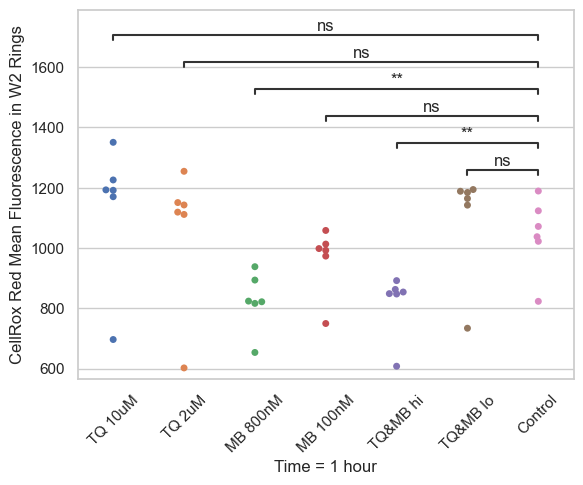

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:2.841e-01 t=1.132e+00
TQ&MB hi vs. Control: t-test independent samples, P_val:2.860e-07 t=-1.203e+01
MB 100nM vs. Control: t-test independent samples, P_val:3.379e-03 t=-3.819e+00
MB 800nM vs. Control: t-test independent samples, P_val:3.597e-09 t=-1.897e+01
TQ 2uM vs. Control: t-test independent samples, P_val:4.638e-02 t=-2.272e+00
TQ 10uM vs. Control: t-test independent samples, P_val:5.731e-02 t=2.147e+00


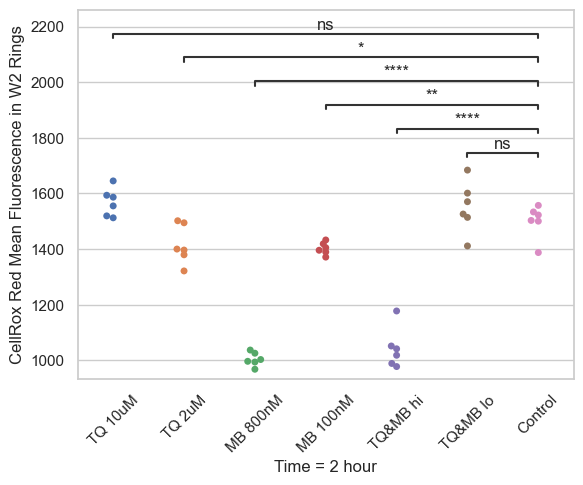

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:6.509e-01 t=-4.664e-01
TQ&MB hi vs. Control: t-test independent samples, P_val:5.405e-03 t=-3.535e+00
MB 100nM vs. Control: t-test independent samples, P_val:2.065e-01 t=-1.351e+00
MB 800nM vs. Control: t-test independent samples, P_val:3.612e-01 t=-9.570e-01
TQ 2uM vs. Control: t-test independent samples, P_val:8.914e-02 t=1.883e+00
TQ 10uM vs. Control: t-test independent samples, P_val:1.260e-01 t=1.670e+00


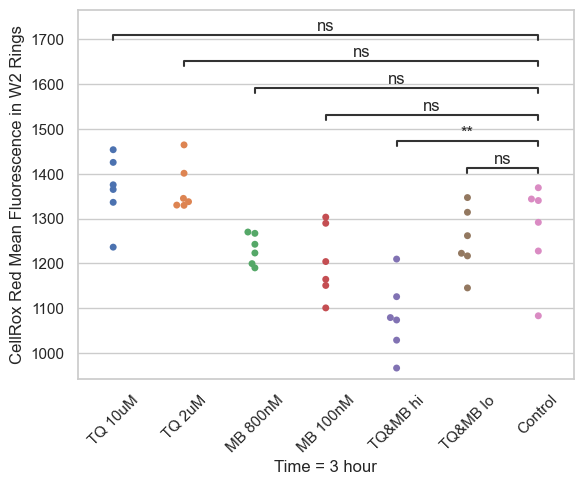

In [6]:
"""
W2
CellRox
"""

df2_cellrox = df2.loc[df2.dye == "CellRox"]

time_list = ["1 hour","2 hour","3 hour"]

for time in time_list:
    df_temp = df2_cellrox.loc[(df2_cellrox.time == time)]
    
    # Set parameters
    data= df_temp
    x="group"
    y="APC"
    xlabel=f"Time = {time}"
    ylabel="CellRox Red Mean Fluorescence in W2 Rings"
    height=6
    aspect=1.5
    order = ["Control",'TQ 2uM','TQ 10uM','MB 100nM','MB 800nM','TQ&MB lo','TQ&MB hi']
    # Assign graph
    plot = sns.swarmplot(data=data, x=x, y=y)
    plot.set(xlabel=xlabel, ylabel=ylabel)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

    # Assign pairs for statistical analysis
    pairs = [
        ('Control', 'TQ 10uM'),
        ('Control', 'MB 800nM'),
        ('Control', 'TQ&MB hi'),
        ('Control', 'TQ 2uM'),
        ('Control', 'MB 100nM'),
        ('Control', 'TQ&MB lo'),
        ]

    # load up statannotation.annotator
    annotator = Annotator(plot, pairs, data=data, x=x, y=y)
    annotator.configure(test="t-test_ind")
    annotator.apply_and_annotate()

    # Save png file and show plot
    savefig = ylabel+"@"+time
    savefig = savefig.replace(' ','_')
    plt.savefig(f"{savefig}.png")
    plt.show()

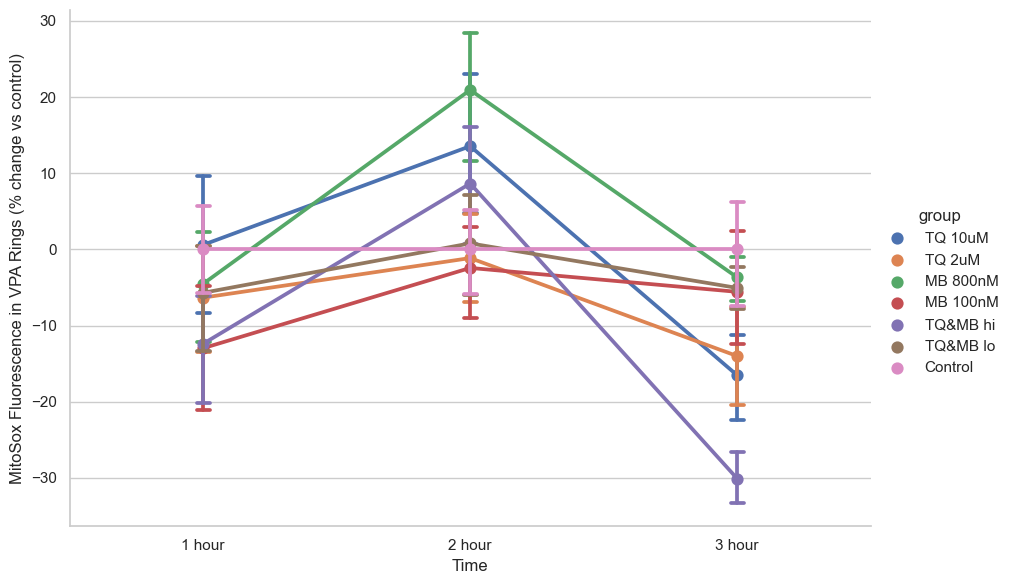

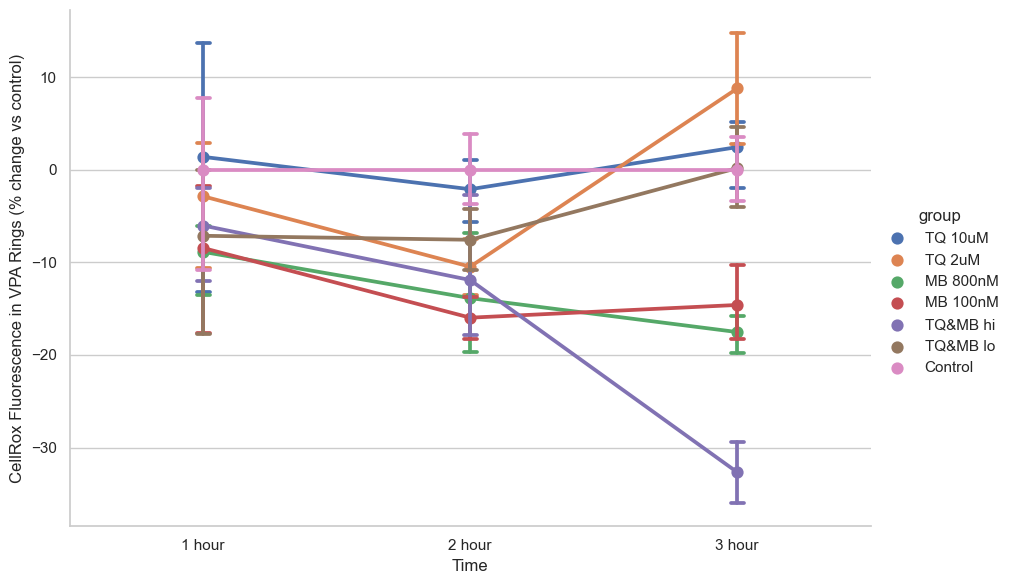

In [7]:
"""
VPA - MitoSox and CellRox normalised to control
"""

df2= df.loc[df.strain == "VPA"]

strain = "VPA"
stage = "Rings"

dye_pop_strain_stage = [
    ("MitoSox","PE",strain, stage),
    ("CellRox","APC",strain, stage)
]

def time_vs_Mean_Fluorescence(dye,pop,strain,stage):
    
    time_list = ["1 hour", "2 hour", "3 hour"]
    for time in time_list:

        #Calculate Mean
        ################################################
        df_Control = df2.loc[(df2.group == "Control")&(df2.time == time)&(df2.dye==dye)][pop]
        df_Control_mean = df_Control.mean()

        # Normalise values
        ################################################
        df2.loc[(df2.time == time)&(df2.dye==dye), pop
                   ]= (((df2[pop]/df_Control_mean))* 100) -100

    
    
    # Set parameters for plots
    data = df2.loc[(df2.dye == dye)]
    x="time"
    y=pop
    # Skip live/dead normalisation

    ylabel=f"{dye} Fluorescence in {strain} {stage} (% change vs control)"
    
    xlabel="Time"
    height=6
    aspect=1.5
    errorbar="sd"
    hue="group"
    kind="point"
    capsize=0.05

    # Assign graph
    ax = sns.catplot(data=data, x=x, y=y, hue=hue,kind=kind,
                     height=height,aspect=aspect, errorbar=errorbar,capsize=capsize)
    ax.set(xlabel=xlabel, ylabel=ylabel)

    # Save png file and show plot
    plt.savefig(ylabel.replace(' ','_'))
    plt.show()

for dye,pop,strain,stage in dye_pop_strain_stage:
    time_vs_Mean_Fluorescence(dye,pop,strain,stage)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:3.006e-01 t=-1.092e+00
TQ&MB hi vs. Control: t-test independent samples, P_val:4.259e-02 t=-2.323e+00
MB 100nM vs. Control: t-test independent samples, P_val:4.877e-02 t=-2.243e+00
MB 800nM vs. Control: t-test independent samples, P_val:4.063e-01 t=-8.670e-01
TQ 2uM vs. Control: t-test independent samples, P_val:2.589e-01 t=-1.197e+00
TQ 10uM vs. Control: t-test independent samples, P_val:9.262e-01 t=9.494e-02


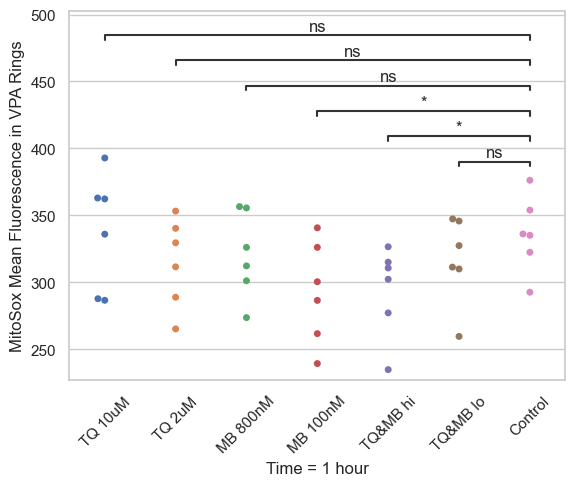

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:8.810e-01 t=1.535e-01
TQ&MB hi vs. Control: t-test independent samples, P_val:1.519e-01 t=1.551e+00
MB 100nM vs. Control: t-test independent samples, P_val:6.187e-01 t=-5.136e-01
MB 800nM vs. Control: t-test independent samples, P_val:5.578e-03 t=3.516e+00
TQ 2uM vs. Control: t-test independent samples, P_val:8.157e-01 t=-2.393e-01
TQ 10uM vs. Control: t-test independent samples, P_val:5.258e-02 t=2.198e+00


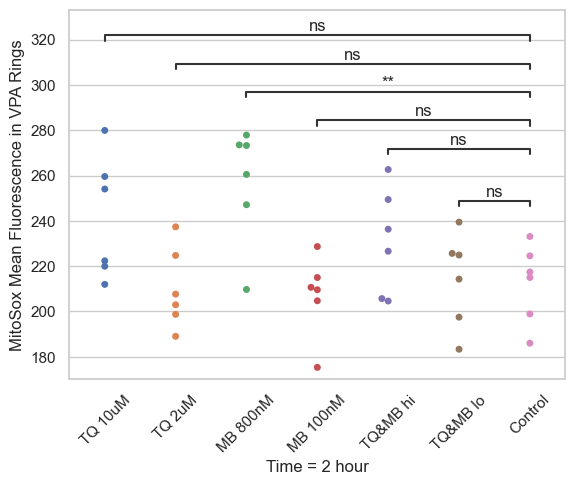

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:2.634e-01 t=-1.185e+00
TQ&MB hi vs. Control: t-test independent samples, P_val:4.552e-05 t=-6.833e+00
MB 100nM vs. Control: t-test independent samples, P_val:3.671e-01 t=-9.446e-01
MB 800nM vs. Control: t-test independent samples, P_val:4.139e-01 t=-8.524e-01
TQ 2uM vs. Control: t-test independent samples, P_val:2.334e-02 t=-2.674e+00
TQ 10uM vs. Control: t-test independent samples, P_val:8.992e-03 t=-3.232e+00


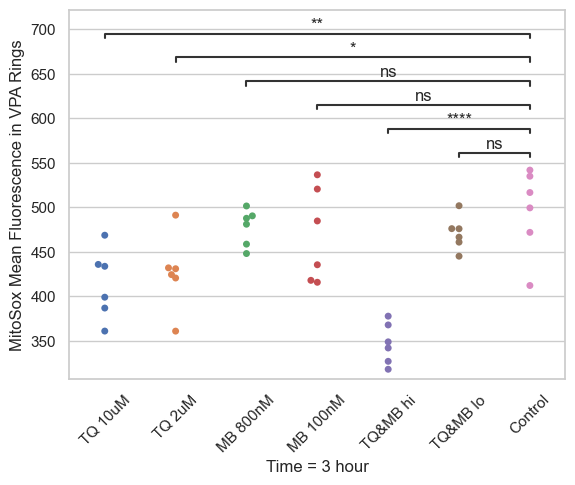

In [8]:
"""
VPA
MitoSox
"""
df3= df.loc[df.strain == "VPA"]
df3_mitosox = df3.loc[df3.dye == "MitoSox"]

time_list = ["1 hour","2 hour","3 hour"]

for time in time_list:
    df_temp = df3_mitosox.loc[(df3_mitosox.time == time)]
    
    # Set parameters
    data= df_temp
    x="group"
    y="PE"
    xlabel=f"Time = {time}"
    ylabel="MitoSox Mean Fluorescence in VPA Rings"
    height=6
    aspect=1.5
    order = ["Control",'TQ 2uM','TQ 10uM','MB 100nM','MB 800nM','TQ&MB lo','TQ&MB hi']
    # Assign graph
    plot = sns.swarmplot(data=data, x=x, y=y)
    plot.set(xlabel=xlabel, ylabel=ylabel)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

    # Assign pairs for statistical analysis
    pairs = [
        ('Control', 'TQ 10uM'),
        ('Control', 'MB 800nM'),
        ('Control', 'TQ&MB hi'),
        ('Control', 'TQ 2uM'),
        ('Control', 'MB 100nM'),
        ('Control', 'TQ&MB lo'),
        ]

    # load up statannotation.annotator
    annotator = Annotator(plot, pairs, data=data, x=x, y=y)
    annotator.configure(test="t-test_ind")
    annotator.apply_and_annotate()

    # Save png file and show plot
    savefig = ylabel+"@"+time
    savefig = savefig.replace(' ','_')
    plt.savefig(f"{savefig}.png")
    plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:3.634e-01 t=-9.522e-01
TQ&MB hi vs. Control: t-test independent samples, P_val:3.556e-01 t=-9.686e-01
MB 100nM vs. Control: t-test independent samples, P_val:2.604e-01 t=-1.193e+00
MB 800nM vs. Control: t-test independent samples, P_val:1.663e-01 t=-1.493e+00
TQ 2uM vs. Control: t-test independent samples, P_val:6.788e-01 t=-4.264e-01
TQ 10uM vs. Control: t-test independent samples, P_val:8.898e-01 t=1.422e-01


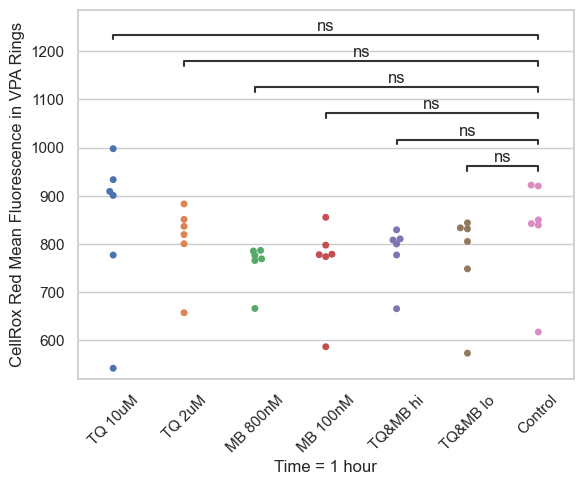

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:2.579e-02 t=-2.616e+00
TQ&MB hi vs. Control: t-test independent samples, P_val:3.152e-02 t=-2.499e+00
MB 100nM vs. Control: t-test independent samples, P_val:9.321e-05 t=-6.265e+00
MB 800nM vs. Control: t-test independent samples, P_val:8.086e-03 t=-3.295e+00
TQ 2uM vs. Control: t-test independent samples, P_val:3.429e-03 t=-3.810e+00
TQ 10uM vs. Control: t-test independent samples, P_val:4.754e-01 t=-7.416e-01


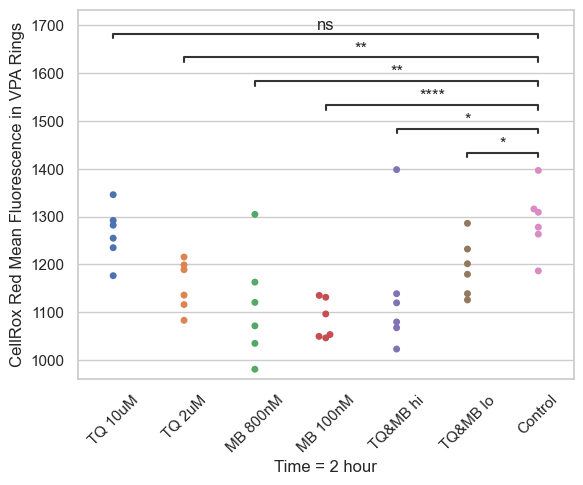

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TQ&MB lo vs. Control: t-test independent samples, P_val:9.551e-01 t=5.774e-02
TQ&MB hi vs. Control: t-test independent samples, P_val:2.804e-07 t=-1.205e+01
MB 100nM vs. Control: t-test independent samples, P_val:6.316e-04 t=-4.891e+00
MB 800nM vs. Control: t-test independent samples, P_val:1.261e-05 t=-7.938e+00
TQ 2uM vs. Control: t-test independent samples, P_val:4.601e-02 t=2.277e+00
TQ 10uM vs. Control: t-test independent samples, P_val:4.095e-01 t=8.608e-01


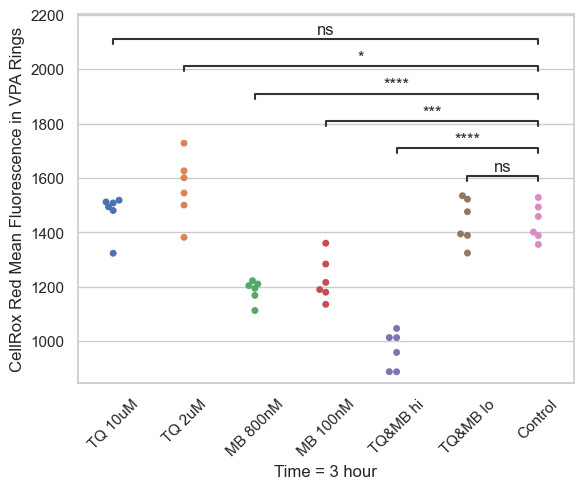

In [9]:

"""
VPA
CellRox
"""
df3= df.loc[df.strain == "VPA"]

df3_cellrox = df3.loc[df3.dye == "CellRox"]

time_list = ["1 hour","2 hour","3 hour"]

for time in time_list:
    df_temp = df3_cellrox.loc[(df3_cellrox.time == time)]
    
    # Set parameters
    data= df_temp
    x="group"
    y="APC"
    xlabel=f"Time = {time}"
    ylabel="CellRox Red Mean Fluorescence in VPA Rings"
    height=6
    aspect=1.5
    order = ["Control",'TQ 2uM','TQ 10uM','MB 100nM','MB 800nM','TQ&MB lo','TQ&MB hi']
    # Assign graph
    plot = sns.swarmplot(data=data, x=x, y=y)
    plot.set(xlabel=xlabel, ylabel=ylabel)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

    # Assign pairs for statistical analysis
    pairs = [
        ('Control', 'TQ 10uM'),
        ('Control', 'MB 800nM'),
        ('Control', 'TQ&MB hi'),
        ('Control', 'TQ 2uM'),
        ('Control', 'MB 100nM'),
        ('Control', 'TQ&MB lo'),
        ]

    # load up statannotation.annotator
    annotator = Annotator(plot, pairs, data=data, x=x, y=y)
    annotator.configure(test="t-test_ind")
    annotator.apply_and_annotate()

    # Save png file and show plot
    savefig = ylabel+"@"+time
    savefig = savefig.replace(' ','_')
    plt.savefig(f"{savefig}.png")
    plt.show()